In [6]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [16]:
warnings.filterwarnings("ignore")

In [17]:
dataset= pd.read_csv(r"C:\Users\Admin\OneDrive\Desktop\uber-raw-data-sep14.csv")

In [18]:
dataset.shape

(499999, 4)

In [25]:
dataset.head(5)

,Date/Time,Lat,Lon,Base
0,2014-09-01 00:01:00,40.2,-74.0,B02512
1,2014-09-01 00:01:00,40.8,-74.0,B02512
2,2014-09-01 00:03:00,40.8,-74.0,B02512
3,2014-09-01 00:06:00,40.7,-74.0,B02512
4,2014-09-01 00:11:00,40.8,-73.9,B02512


In [20]:
dataset.dtypes

Date/Time     object
Lat          float64
Lon          float64
Base          object
dtype: object

In [21]:
# rounfoff data
dataset['Lat']=np.round(dataset["Lat"],1)
dataset['Lon']=np.round(dataset["Lon"],1)

In [22]:
# data type chang
dataset['Date/Time'] = dataset ['Date/Time'].astype("datetime64[ns]")

In [26]:
# data extract
dataset['Pickup Year'] = dataset['Date/Time'].dt.year
dataset['Pickup Month'] = dataset['Date/Time'].dt.month
dataset['Pickup Day'] = dataset['Date/Time'].dt.day
dataset['Pickup weekday '] = dataset['Date/Time'].dt.day_name()
dataset['Pickup Hour'] = dataset['Date/Time'].dt.hour

In [66]:
 dataset ['Pickup Hour'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int32)

In [67]:
def am_pm(hour):
    if hour >=0 and hour <12 :
        return "AM"
    else:
        return "PM"

In [68]:
dataset['Pickup Time'] = dataset ['Pickup Hour'].apply(am_pm)

In [69]:
dataset.head(5)

,Date/Time,Lat,Lon,Base,Pickup Year,Pickup Month,Pickup Day,Pickup weekday,Pickup Hour,Pickup Time
0,2014-09-01 00:01:00,40.2,-74.0,B02512,2014,9,1,Monday,0,AM
1,2014-09-01 00:01:00,40.8,-74.0,B02512,2014,9,1,Monday,0,AM
2,2014-09-01 00:03:00,40.8,-74.0,B02512,2014,9,1,Monday,0,AM
3,2014-09-01 00:06:00,40.7,-74.0,B02512,2014,9,1,Monday,0,AM
4,2014-09-01 00:11:00,40.8,-73.9,B02512,2014,9,1,Monday,0,AM


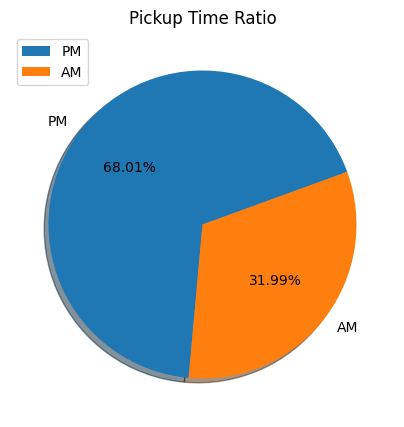

In [95]:
plt.figure(figsize=(5,5))
x = dataset['Pickup Time'].value_counts().index
y = dataset['Pickup Time'].value_counts().values
plt.pie(y,labels=x,autopct="%0.2f%%",shadow=True,startangle=20)
plt.legend(loc=  2)
plt.title("Pickup Time Ratio")
plt.savefig("Pickup Time Ratio.jpg")
plt.show()

In [28]:
 dataset ['Pickup Day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], dtype=int32)

In [76]:
dataset ['Pickup weekday '].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [83]:
pd.pivot_table(index= "Pickup Time", columns= "Pickup weekday ", values= "Pickup Day", data=dataset, aggfunc= "count")

Pickup weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Pickup Time,,,,,,,
AM,21279,23616,19250,19211,24664,28069,23854
PM,53324,43276,54808,32581,49516,53787,52764


In [81]:
dataset ['Pickup weekday '].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

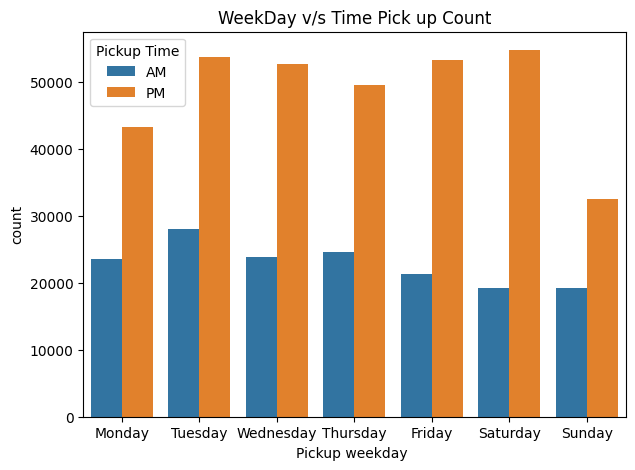

In [88]:
plt.figure(figsize=(7,5))
sns.countplot (x='Pickup weekday ', data=dataset, hue="Pickup Time")
plt.title("WeekDay v/s Time Pick up Count")
plt.savefig("WeekDay v_s Time Pick up Count.jpg")
plt.show()



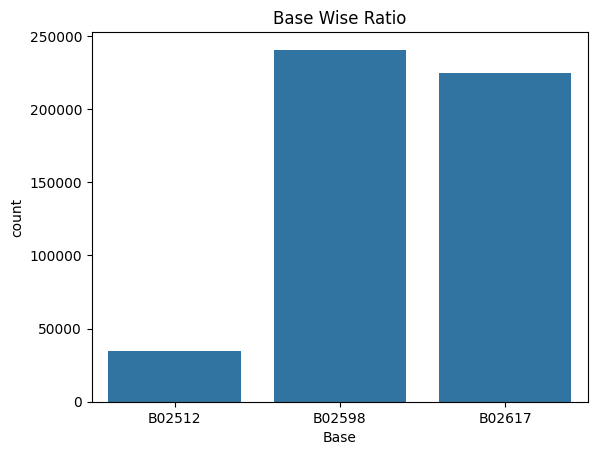

In [89]:
sns.countplot(x='Base', data=dataset)
plt.title("Base Wise Ratio")
plt.savefig("Base Wise Ratio.jpg")
plt.show()


In [72]:
dataset ['Pickup Time'].value_counts()

Pickup Time
PM    340056
AM    159943
Name: count, dtype: int64

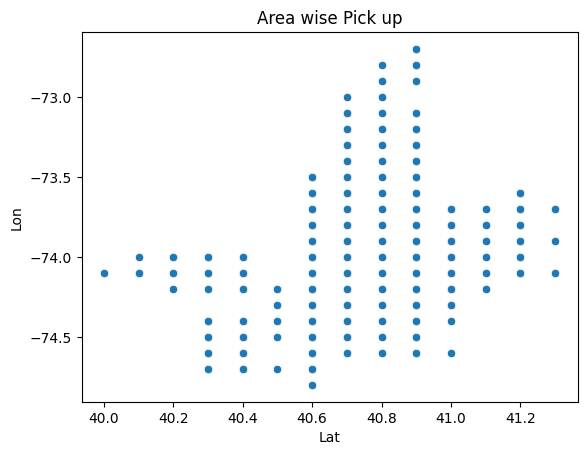

In [90]:
sns.scatterplot(x ="Lat",y ="Lon", data=dataset)
plt.title("Area wise Pick up")
plt.savefig("Area wise Pick up.jpg")
plt.show()

In [39]:
 dataset ['Pickup weekday '].value_counts()

Pickup weekday 
Tuesday      81856
Wednesday    76618
Friday       74603
Thursday     74180
Saturday     74058
Monday       66892
Sunday       51792
Name: count, dtype: int64

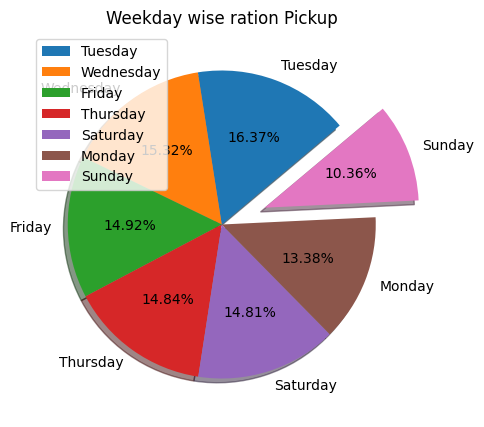

In [91]:
plt.figure(figsize=(5,5))
x = dataset['Pickup weekday '].value_counts().index
y = dataset['Pickup weekday '].value_counts().values
plt.pie(y,labels=x,autopct="%0.2f%%",explode=[0,0,0,0,0,0,0.3],shadow=True,startangle=40)
plt.legend(loc=  2)
plt.title("Weekday wise ration Pickup")
plt.savefig("Weekday wise ration Pickup.jpg")
plt.show()

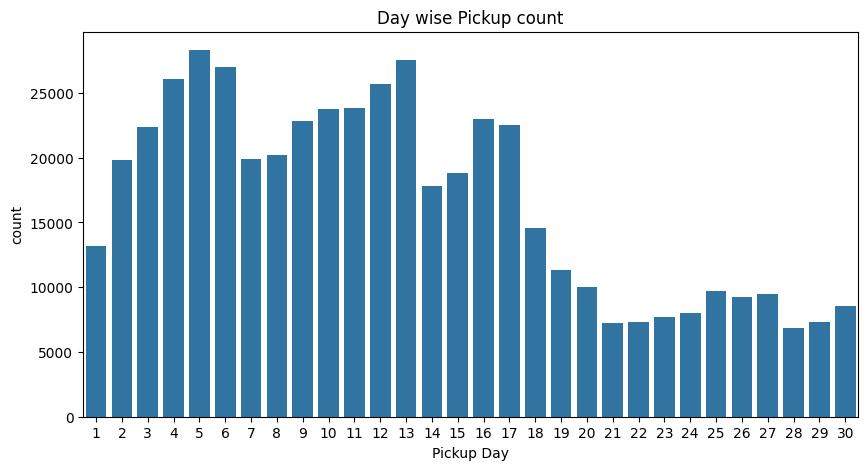

In [94]:
# info
# dataset ['Pickup Day'].unique()
# dataset['Pickup Day'].value_counts()
plt.figure(figsize=(10,5))
sns.countplot (x ="Pickup Day",data=dataset)
plt.title("Day wise Pickup count")
plt.savefig("Day wise Pickup count.jpg")
plt.show()

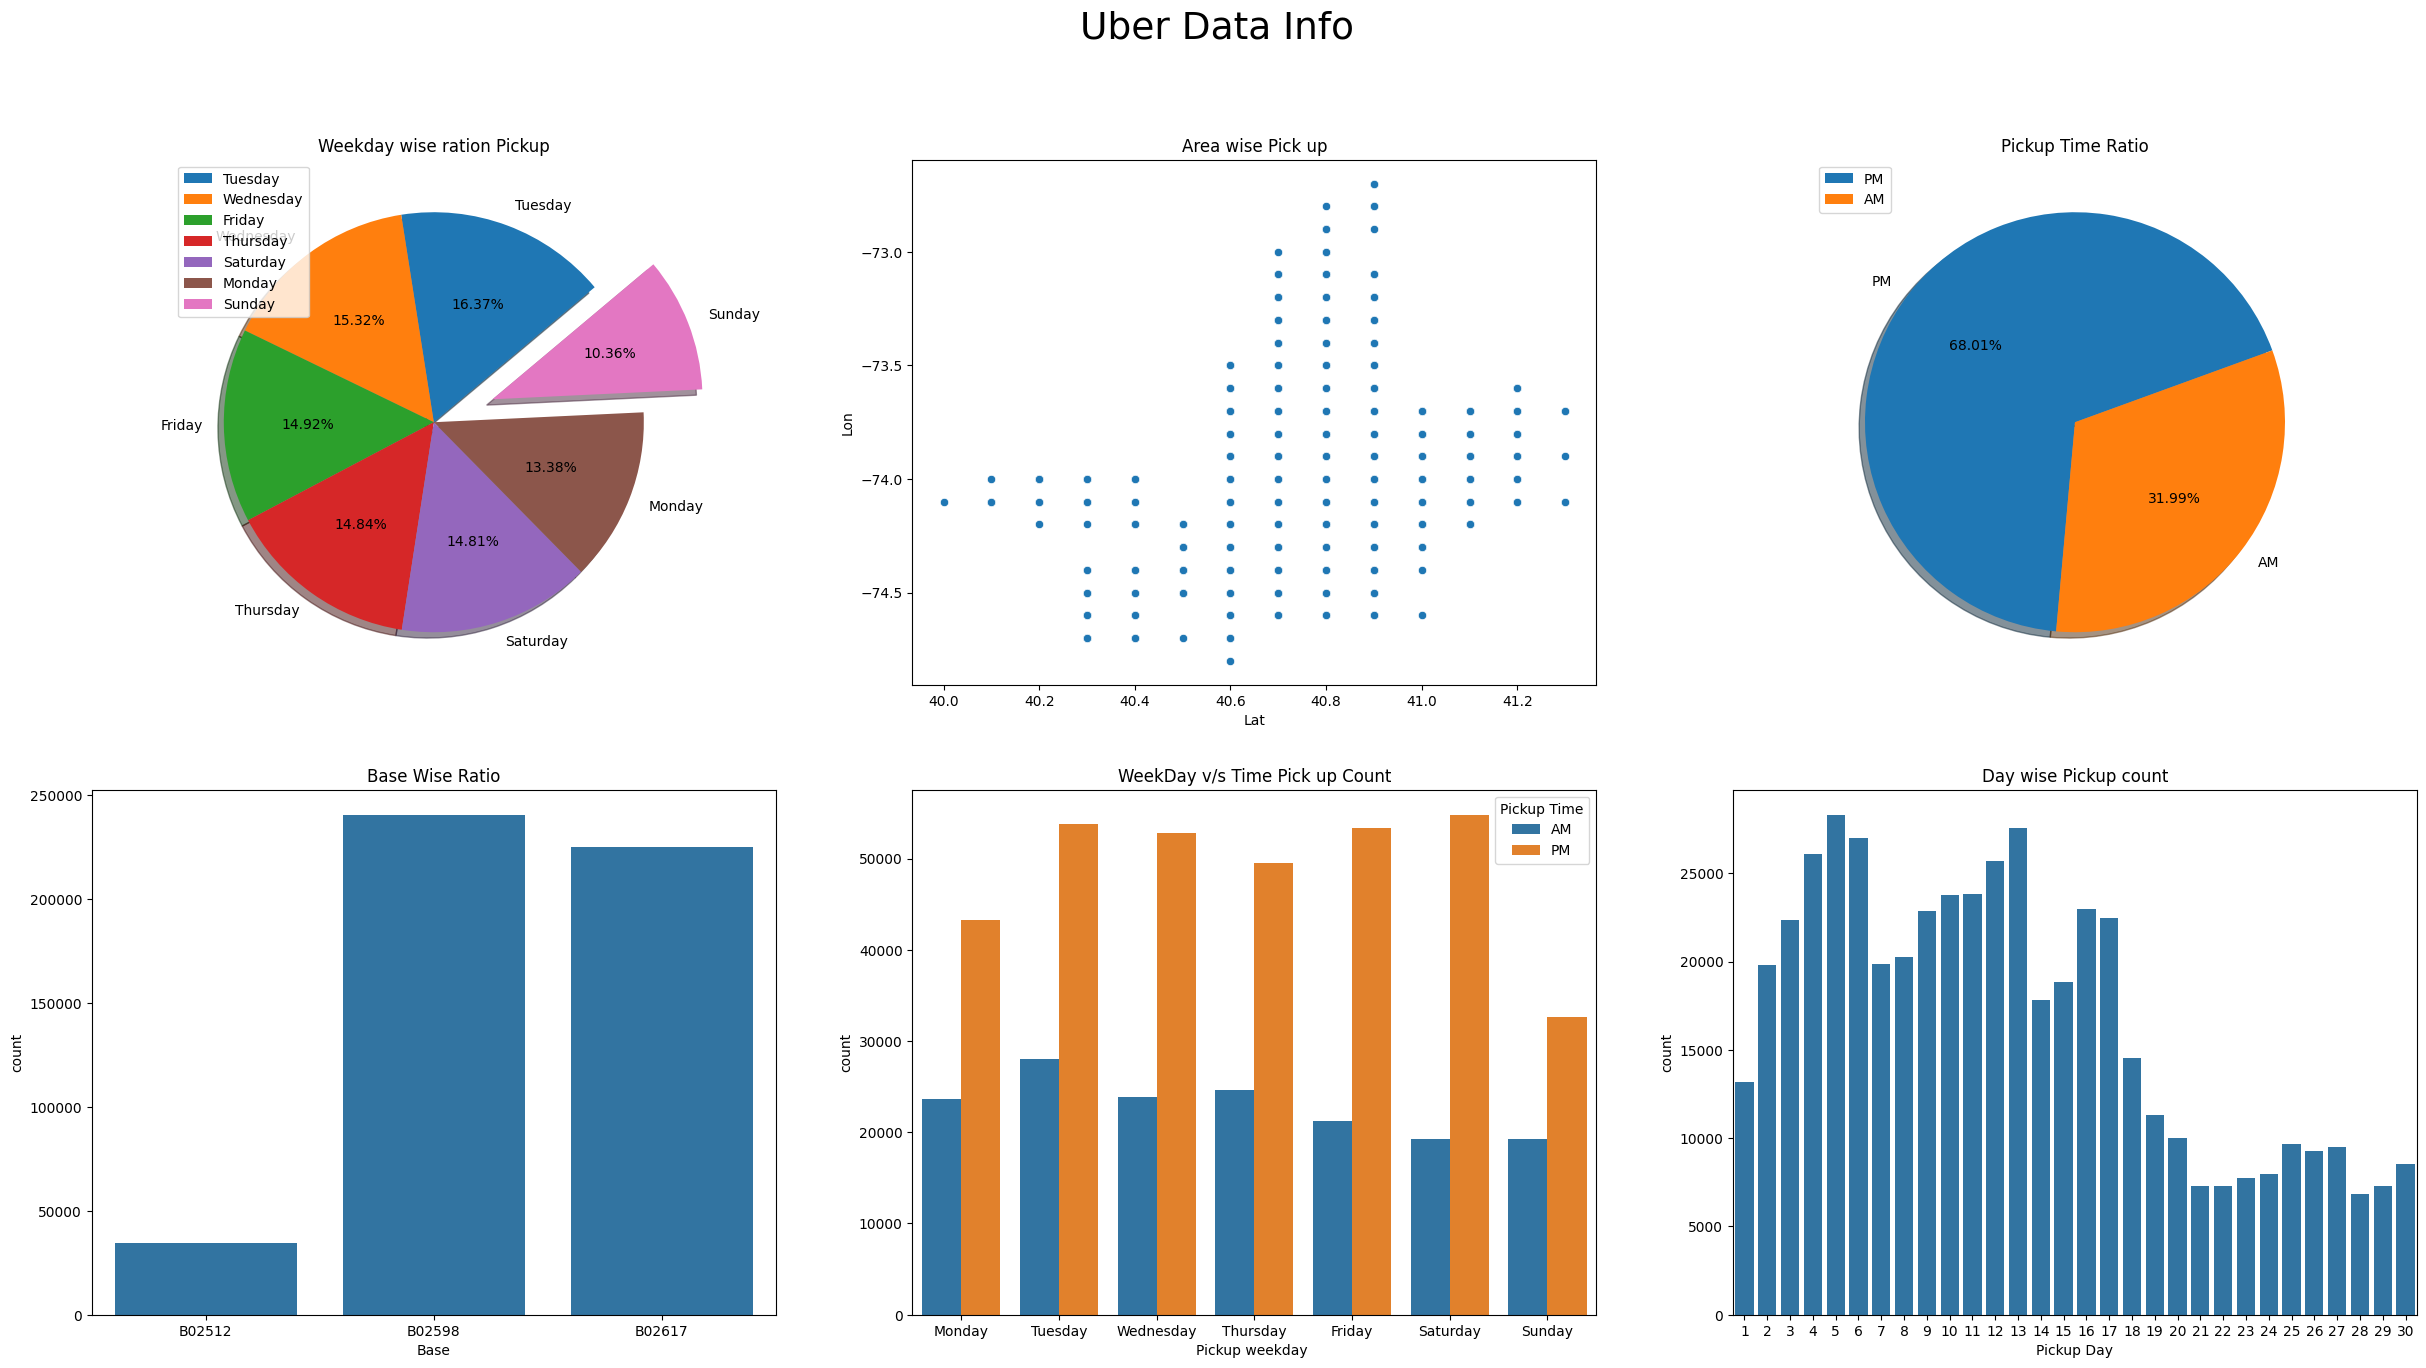

In [93]:
plt.figure(figsize=(30,15))
plt.subplot(2,3,1)  # no of row , np of column, graph no
x = dataset['Pickup weekday '].value_counts().index
y = dataset['Pickup weekday '].value_counts().values
plt.pie(y,labels=x,autopct="%0.2f%%",explode=[0,0,0,0,0,0,0.3],shadow=True,startangle=40)
plt.legend(loc=  2)
plt.title("Weekday wise ration Pickup")
#-------------------------------------------------------------------------------------------------
plt.subplot(2,3,2) # no of row , np of column, graph no
sns.scatterplot(x ="Lat",y ="Lon", data=dataset)
plt.title("Area wise Pick up")
#---------------------------------------------------------------------------------------------------
plt.subplot(2,3,3) # no of row , np of column, graph no
x = dataset['Pickup Time'].value_counts().index
y = dataset['Pickup Time'].value_counts().values
plt.pie(y,labels=x,autopct="%0.2f%%",shadow=True,startangle=20)
plt.legend(loc=  2)
plt.title("Pickup Time Ratio")
#----------------------------------------------------------------------------------------------------
plt.subplot(2,3,4) # no of row , np of column, graph no
sns.countplot(x='Base', data=dataset)
plt.title("Base Wise Ratio")
#-----------------------------------------------------------------------------------------------------
plt.subplot(2,3,5) # no of row , np of column, graph no
sns.countplot (x='Pickup weekday ', data=dataset, hue="Pickup Time")
plt.title("WeekDay v/s Time Pick up Count")
#------------------------------------------------------------------------------------------------------
plt.subplot(2,3,6) # no of row , np of column, graph no
sns.countplot (x ="Pickup Day",data=dataset)
plt.title("Day wise Pickup count")


plt.suptitle("Uber Data Info", fontsize =27)
plt.savefig("Uber data info.jpg")
plt.show()